# Importing Dataset and libraries (and some preliminary exploration to understand data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_mi_gdppc = pd.read_csv("/Users/jasmineliu/Downloads/QTM350/Final project/API_NY.GDP.PCAP.KD_DS2_en_csv_v2_77504/Metadata_Indicator_API_NY.GDP.PCAP.KD_DS2_en_csv_v2_77504.csv")
df_mc_gdppc = pd.read_csv("/Users/jasmineliu/Downloads/QTM350/Final project/API_NY.GDP.PCAP.KD_DS2_en_csv_v2_77504/Metadata_Country_API_NY.GDP.PCAP.KD_DS2_en_csv_v2_77504.csv")
df_d_gdppc = pd.read_csv("/Users/jasmineliu/Downloads/QTM350/Final project/API_NY.GDP.PCAP.KD_DS2_en_csv_v2_77504/API_NY.GDP.PCAP.KD_DS2_en_csv_v2_77504.csv", skiprows=4)


In [3]:
df_mc_gdppc.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [4]:
print(df_mc_gdppc.shape)

(265, 6)


In [5]:
df_mc_gdppc["IncomeGroup"].unique()

array(['High income', nan, 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

In [6]:
df_d_gdppc.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,28419.264534,28737.896485,30598.649023,31172.802513,30317.607388,23015.742045,29390.380953,32492.178878,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1169.164624,1144.108670,1201.300157,1234.773598,1257.127986,1285.221264,...,1498.805084,1490.859688,1490.797648,1490.701057,1483.415659,1404.554538,1430.424771,1444.522962,1445.801128,NaN
2,Afghanistan,AFG,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,566.881130,564.920841,563.488236,553.973306,559.140954,529.144910,407.616505,372.615895,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1108.162434,1105.532621,1122.437428,1176.861392,1213.649116,1235.726955,...,1882.518808,1835.387229,1827.858406,1830.945623,1841.436116,1776.474134,1801.092775,1822.955460,1837.211718,NaN
4,Angola,AGO,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,3217.339240,3023.916319,2914.127139,2777.843042,2666.253915,2435.024854,2387.429907,2385.119956,2333.718775,NaN


In [7]:
income_group_counts = df_mc_gdppc.groupby('IncomeGroup').size()
print(income_group_counts)

IncomeGroup
High income            85
Low income             26
Lower middle income    51
Upper middle income    54
dtype: int64


In [8]:
df_mc_gdppc.query('Region.isnull()') #these are the country code that are just regions instead of individual country

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
7,ARB,NaN,NaN,Arab World aggregate. Arab World is composed o...,Arab World,NaN
36,CEB,NaN,NaN,Central Europe and the Baltics aggregate.,Central Europe and the Baltics,NaN
49,CSS,NaN,NaN,Caribbean small states aggregate.,Caribbean small states,NaN
61,EAP,NaN,NaN,NaN,East Asia & Pacific (excluding high income),NaN
62,EAR,NaN,NaN,Early-dividend countries are mostly lower-midd...,Early-demographic dividend,NaN
63,EAS,NaN,NaN,East Asia and Pacific regional aggregate (incl...,East Asia & Pacific,NaN
64,ECA,NaN,NaN,NaN,Europe & Central Asia (excluding high income),NaN
65,ECS,NaN,NaN,Europe and Central Asia regional aggregate (in...,Europe & Central Asia,NaN


In [9]:
df_d_gdppc["Country Name"].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In [10]:
usa_data = df_d_gdppc[df_d_gdppc['Country Name'] == 'United States']
df_d_melted = usa_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                    var_name='Year', 
                    value_name='GDP per Capita')
df_d_melted  = df_d_melted.dropna(subset=['GDP per Capita'])
df_d_melted['Year'] = df_d_melted['Year'].astype(int)
df_d_melted = df_d_melted.sort_values('Year')
df_d_melted 


,Country Name,Country Code,Indicator Name,Indicator Code,Year,GDP per Capita
0,United States,USA,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1960,18991.544603
1,United States,USA,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1961,19108.935365
2,United States,USA,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1962,19965.143575
3,United States,USA,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1963,20545.784245
4,United States,USA,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1964,21437.584070
...,...,...,...,...,...,...
59,United States,USA,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2019,61330.645977
60,United States,USA,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2020,59394.778327
61,United States,USA,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2021,62741.001813
62,United States,USA,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2022,63720.764161


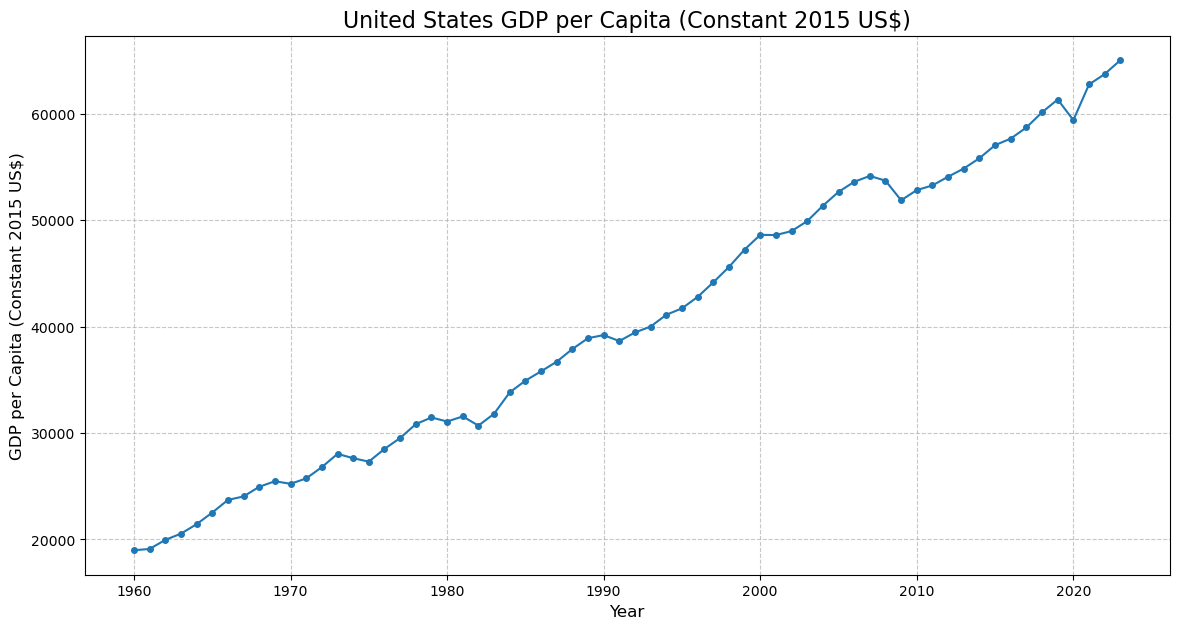

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(df_d_melted['Year'], df_d_melted['GDP per Capita'], marker='o', linestyle='-', markersize=4)
plt.title("United States GDP per Capita (Constant 2015 US$)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("GDP per Capita (Constant 2015 US$)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

In [12]:
china_data = df_d_gdppc[df_d_gdppc['Country Name'] == 'China']
df_d_melted = china_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                    var_name='Year', 
                    value_name='GDP per Capita')
df_d_melted  = df_d_melted.dropna(subset=['GDP per Capita'])
df_d_melted['Year'] = df_d_melted['Year'].astype(int)
df_d_melted = df_d_melted.sort_values('Year')
df_d_melted 

,Country Name,Country Code,Indicator Name,Indicator Code,Year,GDP per Capita
0,China,CHN,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1960,238.217052
1,China,CHN,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1961,175.023681
2,China,CHN,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1962,163.907044
3,China,CHN,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1963,176.400456
4,China,CHN,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1964,203.687834
...,...,...,...,...,...,...
59,China,CHN,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2019,10155.510883
60,China,CHN,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2020,10358.169997
61,China,CHN,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2021,11223.255348
62,China,CHN,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2022,11560.242122


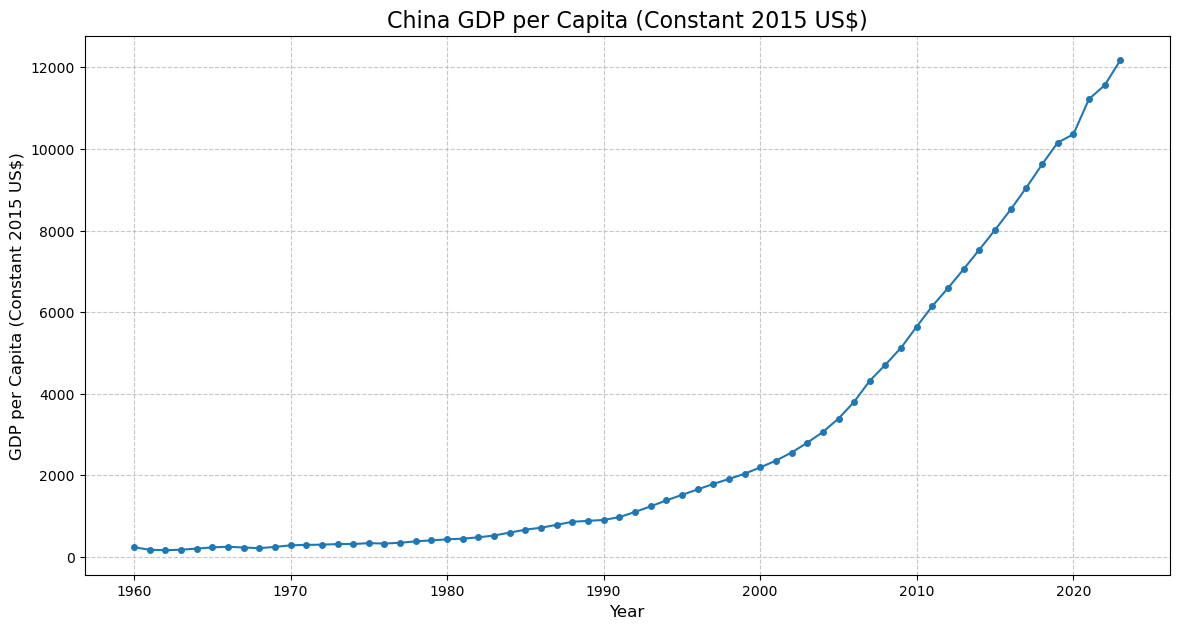

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(df_d_melted['Year'], df_d_melted['GDP per Capita'], marker='o', linestyle='-', markersize=4)
plt.title("China GDP per Capita (Constant 2015 US$)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("GDP per Capita (Constant 2015 US$)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

In [14]:
india_data = df_d_gdppc[df_d_gdppc['Country Name'] == 'India']
df_d_melted = india_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                    var_name='Year', 
                    value_name='GDP per Capita')
df_d_melted  = df_d_melted.dropna(subset=['GDP per Capita'])
df_d_melted['Year'] = df_d_melted['Year'].astype(int)
df_d_melted = df_d_melted.sort_values('Year')
df_d_melted 

,Country Name,Country Code,Indicator Name,Indicator Code,Year,GDP per Capita
0,India,IND,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1960,305.789258
1,India,IND,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1961,309.946690
2,India,IND,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1962,311.741195
3,India,IND,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1963,322.885634
4,India,IND,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1964,339.057314
...,...,...,...,...,...,...
59,India,IND,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2019,1944.314848
60,India,IND,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2020,1814.561570
61,India,IND,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2021,1974.580602
62,India,IND,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2022,2098.220931


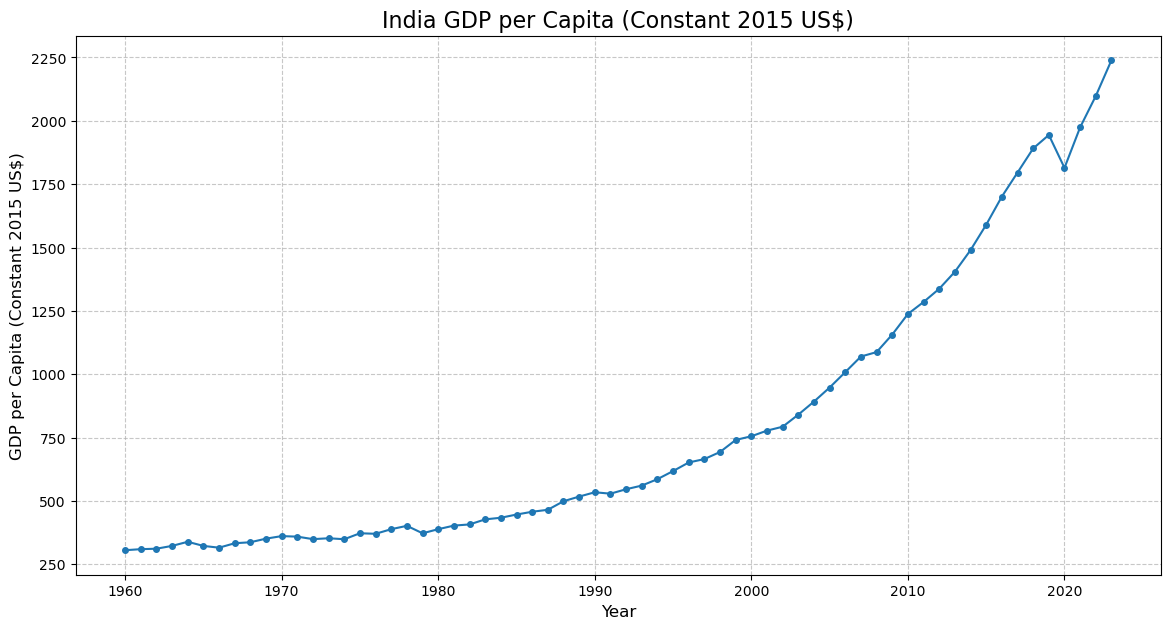

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(df_d_melted['Year'], df_d_melted['GDP per Capita'], marker='o', linestyle='-', markersize=4)
plt.title("India GDP per Capita (Constant 2015 US$)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("GDP per Capita (Constant 2015 US$)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

In [16]:
uk_data = df_d_gdppc[df_d_gdppc['Country Name'] == 'United Kingdom']
df_d_melted = uk_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                    var_name='Year', 
                    value_name='GDP per Capita')
df_d_melted  = df_d_melted.dropna(subset=['GDP per Capita'])
df_d_melted['Year'] = df_d_melted['Year'].astype(int)
df_d_melted = df_d_melted.sort_values('Year')
df_d_melted 

,Country Name,Country Code,Indicator Name,Indicator Code,Year,GDP per Capita
0,United Kingdom,GBR,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1960,15135.111955
1,United Kingdom,GBR,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1961,15426.201624
2,United Kingdom,GBR,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1962,15463.894160
3,United Kingdom,GBR,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1963,16094.471648
4,United Kingdom,GBR,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1964,16884.774618
...,...,...,...,...,...,...
59,United Kingdom,GBR,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2019,47240.599622
60,United Kingdom,GBR,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2020,42191.917367
61,United Kingdom,GBR,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2021,45889.611023
62,United Kingdom,GBR,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2022,47343.474378


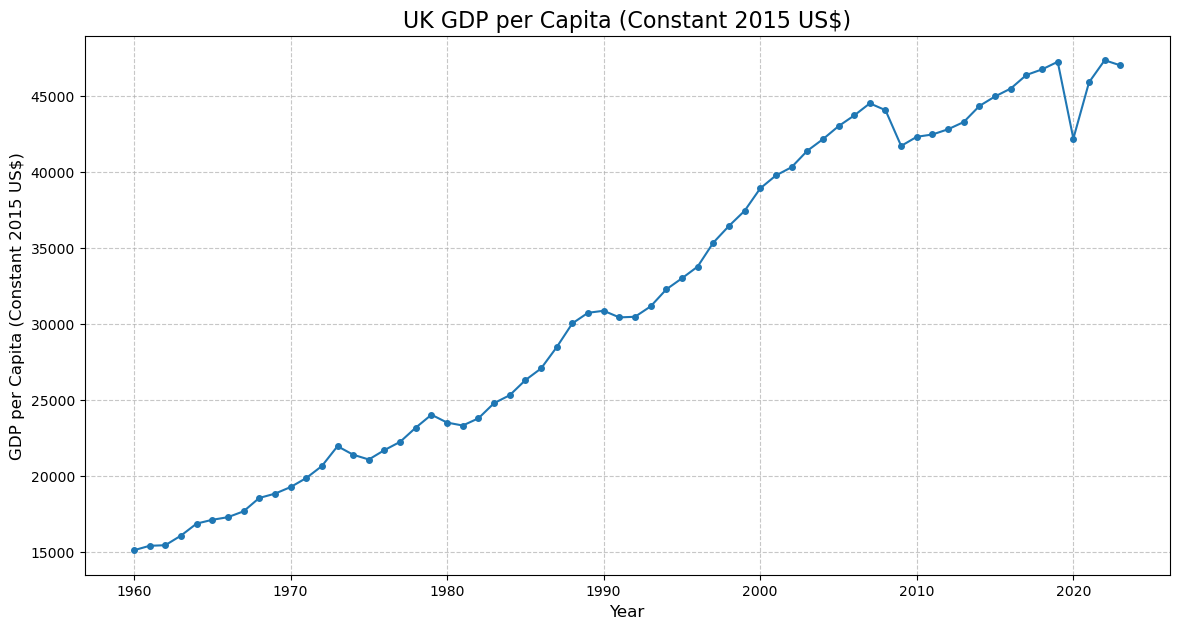

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(df_d_melted['Year'], df_d_melted['GDP per Capita'], marker='o', linestyle='-', markersize=4)
plt.title("UK GDP per Capita (Constant 2015 US$)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("GDP per Capita (Constant 2015 US$)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

In [18]:
df_mi_gdpg = pd.read_csv("/Users/jasmineliu/Downloads/QTM350/Final project/API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_73468/Metadata_Indicator_API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_73468.csv")
df_mc_gdpg = pd.read_csv("/Users/jasmineliu/Downloads/QTM350/Final project/API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_73468/Metadata_Country_API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_73468.csv")
df_d_gdpg = pd.read_csv("/Users/jasmineliu/Downloads/QTM350/Final project/API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_73468/API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_73468.csv", skiprows=4)


In [19]:
usa_data_2 = df_d_gdpg[df_d_gdpg['Country Name'] == 'United States']
df_d_melted_2 = usa_data_2.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                    var_name='Year', 
                    value_name='GDP Growth')
df_d_melted_2  = df_d_melted_2.dropna(subset=['GDP Growth'])
df_d_melted_2['Year'] = df_d_melted_2['Year'].astype(int)
df_d_melted_2 = df_d_melted_2.sort_values('Year')
df_d_melted_2

,Country Name,Country Code,Indicator Name,Indicator Code,Year,GDP Growth
1,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1961,2.300000
2,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1962,6.100000
3,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1963,4.400000
4,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1964,5.800000
5,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1965,6.400000
...,...,...,...,...,...,...
59,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2019,2.467038
60,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2020,-2.213469
61,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2021,5.800206
62,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2022,1.935496


Text(0, 0.5, 'GDP Growth)')

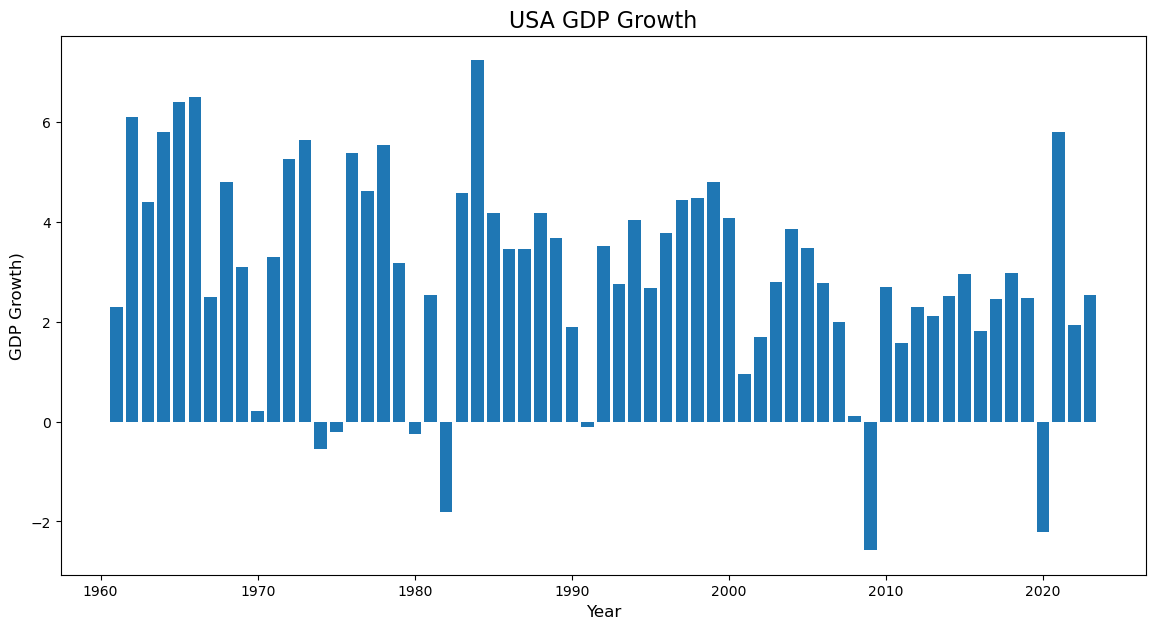

In [20]:
plt.figure(figsize=(14, 7))
plt.bar(df_d_melted_2['Year'], df_d_melted_2['GDP Growth'])
plt.title("USA GDP Growth", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("GDP Growth)", fontsize=12)

In [21]:
df_mi_e = pd.read_csv("/Users/jasmineliu/Downloads/QTM350/Final project/API_SL.EMP.TOTL.SP.ZS_DS2_en_csv_v2_4506/Metadata_Indicator_API_SL.EMP.TOTL.SP.ZS_DS2_en_csv_v2_4506.csv")
df_mc_e = pd.read_csv("/Users/jasmineliu/Downloads/QTM350/Final project/API_SL.EMP.TOTL.SP.ZS_DS2_en_csv_v2_4506/Metadata_Country_API_SL.EMP.TOTL.SP.ZS_DS2_en_csv_v2_4506.csv")
df_d_e = pd.read_csv("/Users/jasmineliu/Downloads/QTM350/Final project/API_SL.EMP.TOTL.SP.ZS_DS2_en_csv_v2_4506/API_SL.EMP.TOTL.SP.ZS_DS2_en_csv_v2_4506.csv", skiprows=4)

In [22]:
df_mc_e.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [23]:
usa_data_3 = df_d_e[df_d_e['Country Name'] == 'United States']
df_d_melted_3 = usa_data_3.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                    var_name='Year', 
                    value_name='Employment to Population Ratio')
df_d_melted_3  = df_d_melted_3.dropna(subset=['Employment to Population Ratio'])
df_d_melted_3['Year'] = df_d_melted_3['Year'].astype(int)
df_d_melted_3 = df_d_melted_3.sort_values('Year')
df_d_melted_3

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Employment to Population Ratio
31,United States,USA,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,1991,60.343
32,United States,USA,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,1992,60.119
33,United States,USA,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,1993,60.412
34,United States,USA,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,1994,61.220
35,United States,USA,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,1995,61.613
36,United States,USA,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,1996,61.899
37,United States,USA,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,1997,62.514
38,United States,USA,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,1998,62.777
39,United States,USA,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,1999,63.032
40,United States,USA,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,2000,63.297


Text(0, 0.5, 'Employment to Population Ratio)')

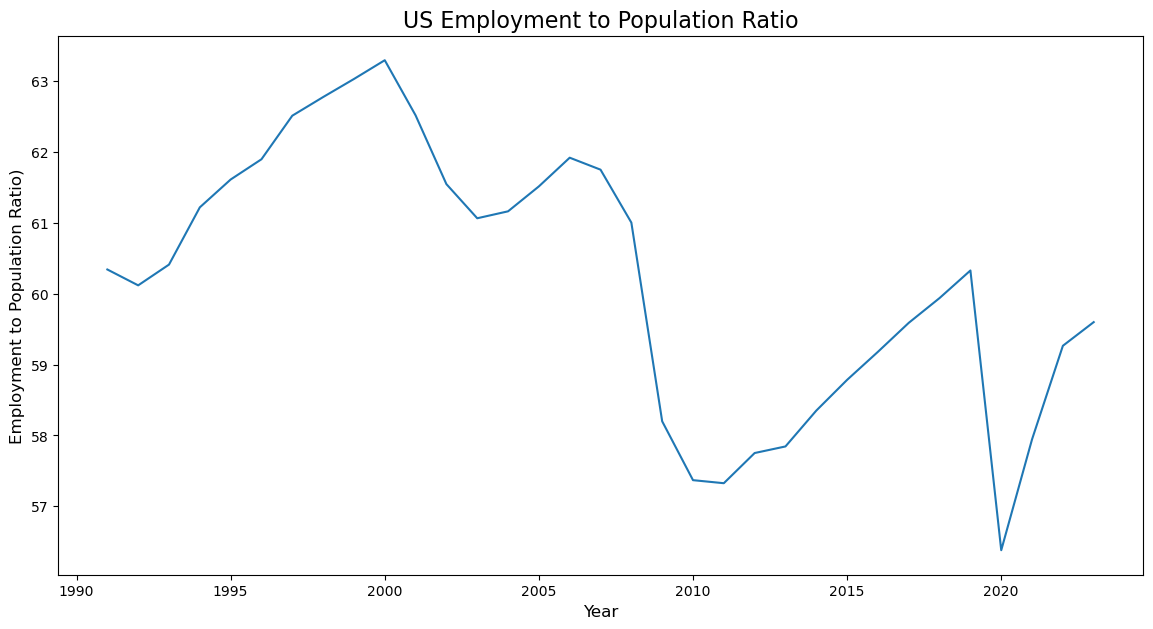

In [24]:
plt.figure(figsize=(14, 7))
plt.plot(df_d_melted_3['Year'], df_d_melted_3['Employment to Population Ratio'])
plt.title("US Employment to Population Ratio", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Employment to Population Ratio)", fontsize=12)

## Merging income group label with all three metadata based on country code.
This produces 3 data consiting of country name, country code, income group, and their original features.

In [25]:
merged_data_gdppc = pd.merge(df_d_gdppc, df_mc_gdppc, on="Country Code", how="left")
merged_data_gdppc.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2020,2021,2022,2023,Unnamed: 68,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,Aruba,ABW,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,23015.742045,29390.380953,32492.178878,NaN,NaN,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1169.164624,1144.108670,1201.300157,1234.773598,1257.127986,1285.221264,...,1404.554538,1430.424771,1444.522962,1445.801128,NaN,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,Afghanistan,AFG,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,529.144910,407.616505,372.615895,NaN,NaN,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,Africa Western and Central,AFW,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1108.162434,1105.532621,1122.437428,1176.861392,1213.649116,1235.726955,...,1776.474134,1801.092775,1822.955460,1837.211718,NaN,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,Angola,AGO,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2435.024854,2387.429907,2385.119956,2333.718775,NaN,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [26]:
merged_data_e = pd.merge(df_d_e, df_mc_e, on="Country Code", how="left")
merged_data_e.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2020,2021,2022,2023,Unnamed: 68,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,Aruba,ABW,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,Africa Eastern and Southern,AFE,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,63.560774,63.612563,64.302928,64.436966,NaN,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,Afghanistan,AFG,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,36.711000,36.263000,32.333000,31.268000,NaN,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,Africa Western and Central,AFW,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,58.261096,58.490208,59.433005,59.620615,NaN,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,Angola,AGO,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,62.550000,64.304000,64.447000,64.492000,NaN,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [27]:
merged_data_gdpg = pd.merge(df_d_gdpg, df_mc_gdpg, on="Country Code", how="left")
merged_data_gdpg.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2020,2021,2022,2023,Unnamed: 68,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-23.982581,27.639357,10.458317,NaN,NaN,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.460106,7.868013,5.616400,4.668135,5.138990,...,-2.780379,4.497380,3.554422,2.622310,NaN,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.351101,-20.738839,-6.240172,NaN,NaN,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.873455,3.707643,7.145784,5.406403,4.102491,...,-1.004417,3.994854,3.784486,3.342776,NaN,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.638215,1.199211,3.045403,0.856001,NaN,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


### Some exploratory analysis:

In [28]:
grouped_count = merged_data_gdppc.groupby("IncomeGroup").size()
print(grouped_count)

IncomeGroup
High income            85
Low income             26
Lower middle income    51
Upper middle income    54
dtype: int64


In [29]:
# Filter data for only 'High income' group
high_income_data = merged_data_gdppc[merged_data_gdppc["IncomeGroup"] == "High income"]
high_income_data["Country Name"].unique()

array(['Aruba', 'Andorra', 'United Arab Emirates', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Belgium',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bermuda', 'Barbados',
       'Brunei Darussalam', 'Canada', 'Switzerland', 'Channel Islands',
       'Chile', 'Curacao', 'Cayman Islands', 'Cyprus', 'Czechia',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'Faroe Islands', 'United Kingdom', 'Gibraltar', 'Greece',
       'Greenland', 'Guam', 'Guyana', 'Hong Kong SAR, China', 'Croatia',
       'Hungary', 'Isle of Man', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Japan', 'St. Kitts and Nevis', 'Korea, Rep.', 'Kuwait',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Latvia',
       'Macao SAR, China', 'St. Martin (French part)', 'Monaco', 'Malta',
       'Northern Mariana Islands', 'New Caledonia', 'Netherlands',
       'Norway', 'Nauru', 'New Zealand', 'Oman', 'Panama', 'Palau',
       'Poland', 'Puerto Rico', 'Portugal',

In [30]:
# Filter data for only 'low income' group
low_income_data = merged_data_gdppc[merged_data_gdppc["IncomeGroup"] == "Low income"]
low_income_data["Country Name"].unique()

array(['Afghanistan', 'Burundi', 'Burkina Faso',
       'Central African Republic', 'Congo, Dem. Rep.', 'Eritrea',
       'Ethiopia', 'Gambia, The', 'Guinea-Bissau', 'Liberia',
       'Madagascar', 'Mali', 'Mozambique', 'Malawi', 'Niger',
       "Korea, Dem. People's Rep.", 'Rwanda', 'Sudan', 'Sierra Leone',
       'Somalia', 'South Sudan', 'Syrian Arab Republic', 'Chad', 'Togo',
       'Uganda', 'Yemen, Rep.'], dtype=object)

In [31]:
afghan_data= df_d_e[df_d_e['Country Name'] == 'Afghanistan']
afghan_d_melted = afghan_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                    var_name='Year', 
                    value_name='Employment to Population Ratio')
afghan_d_melted  = afghan_d_melted.dropna(subset=['Employment to Population Ratio'])
afghan_d_melted['Year'] = afghan_d_melted['Year'].astype(int)
afghan_d_melted = afghan_d_melted.sort_values('Year')

Text(0, 0.5, 'Employment to Population Ratio)')

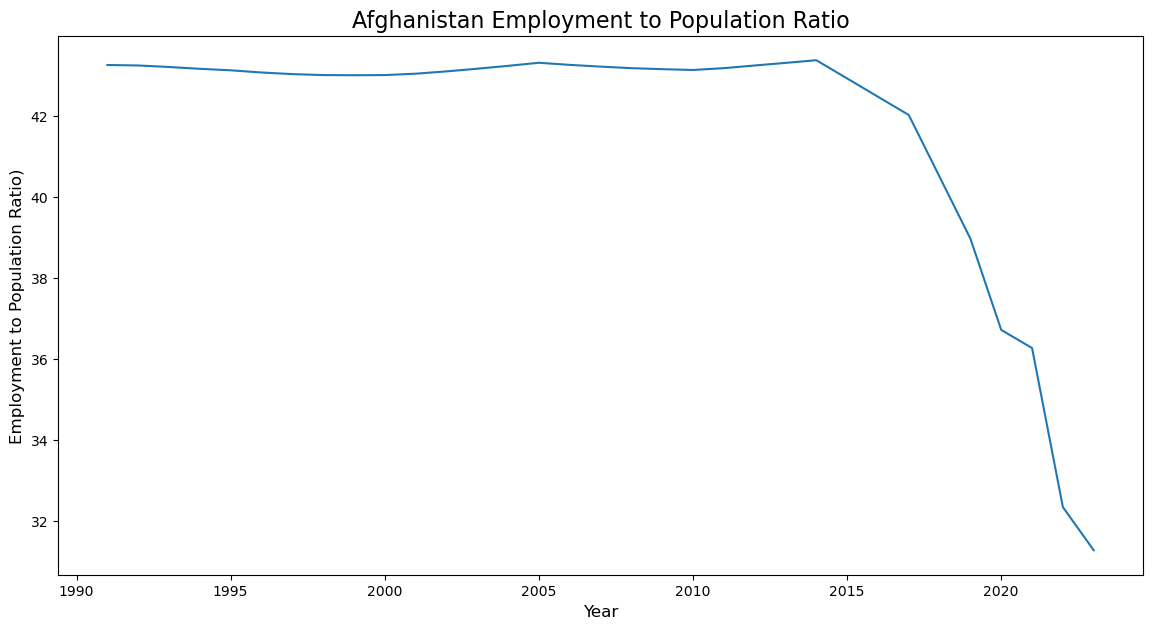

In [32]:
plt.figure(figsize=(14, 7))
plt.plot(afghan_d_melted['Year'], afghan_d_melted['Employment to Population Ratio'])
plt.title("Afghanistan Employment to Population Ratio", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Employment to Population Ratio)", fontsize=12)

In [33]:
afghan_d_melted.sort_values(by="Year", ascending=False)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Employment to Population Ratio
63,Afghanistan,AFG,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,2023,31.268
62,Afghanistan,AFG,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,2022,32.333
61,Afghanistan,AFG,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,2021,36.263
60,Afghanistan,AFG,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,2020,36.711
59,Afghanistan,AFG,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,2019,38.965
58,Afghanistan,AFG,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,2018,40.493
57,Afghanistan,AFG,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,2017,42.021
56,Afghanistan,AFG,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,2016,42.472
55,Afghanistan,AFG,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,2015,42.924
54,Afghanistan,AFG,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,2014,43.374


In [34]:
afghan_data= df_d_gdppc[df_d_e['Country Name'] == 'Afghanistan']
afghan_d_melted = afghan_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                    var_name='Year', 
                    value_name='GDP per Capita')
afghan_d_melted  = afghan_d_melted.dropna(subset=['GDP per Capita'])
afghan_d_melted['Year'] = afghan_d_melted['Year'].astype(int)
afghan_d_melted = afghan_d_melted.sort_values('Year')

Text(0, 0.5, 'GDP per Capita')

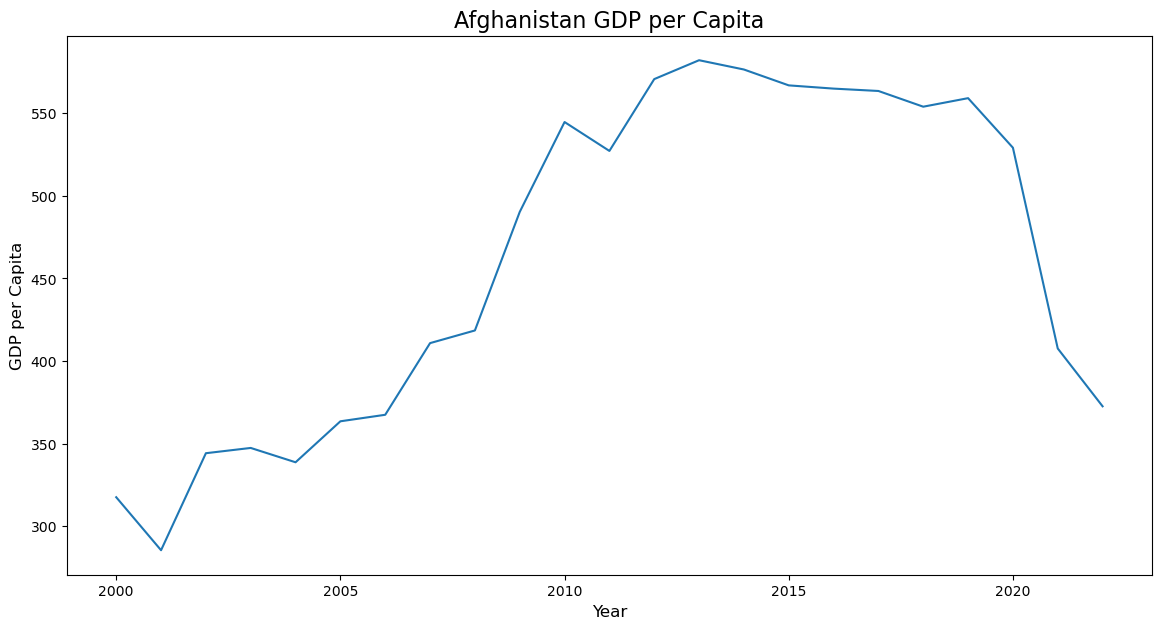

In [35]:
plt.figure(figsize=(14, 7))
plt.plot(afghan_d_melted['Year'], afghan_d_melted['GDP per Capita'])
plt.title("Afghanistan GDP per Capita", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("GDP per Capita", fontsize=12)

In [36]:
USA_data= df_d_e[df_d_e['Country Name'] == 'United States']
USA_d_melted = USA_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                    var_name='Year', 
                    value_name='Employment to Population Ratio')
USA_d_melted  = USA_d_melted.dropna(subset=['Employment to Population Ratio'])
USA_d_melted['Year'] = USA_d_melted['Year'].astype(int)
USA_d_melted = USA_d_melted.sort_values('Year')

Text(0, 0.5, 'Employment to Population Ratio)')

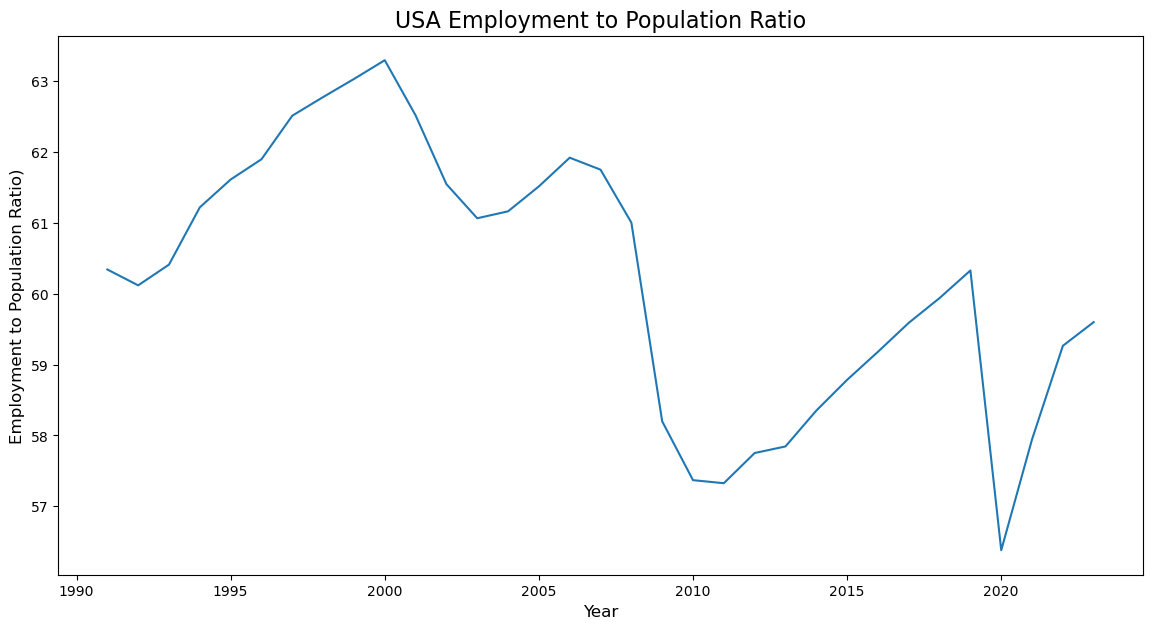

In [37]:
plt.figure(figsize=(14, 7))
plt.plot(USA_d_melted['Year'], USA_d_melted['Employment to Population Ratio'])
plt.title("USA Employment to Population Ratio", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Employment to Population Ratio)", fontsize=12)

In [38]:
USA_data= df_d_gdpg[df_d_gdpg['Country Name'] == 'United States']
USA_d_melted = USA_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                    var_name='Year', 
                    value_name='GDP Growth')
USA_d_melted  = USA_d_melted.dropna(subset=['GDP Growth'])
USA_d_melted['Year'] = USA_d_melted['Year'].astype(int)
USA_d_melted = USA_d_melted.sort_values('Year')

Text(0, 0.5, 'GDP Growth')

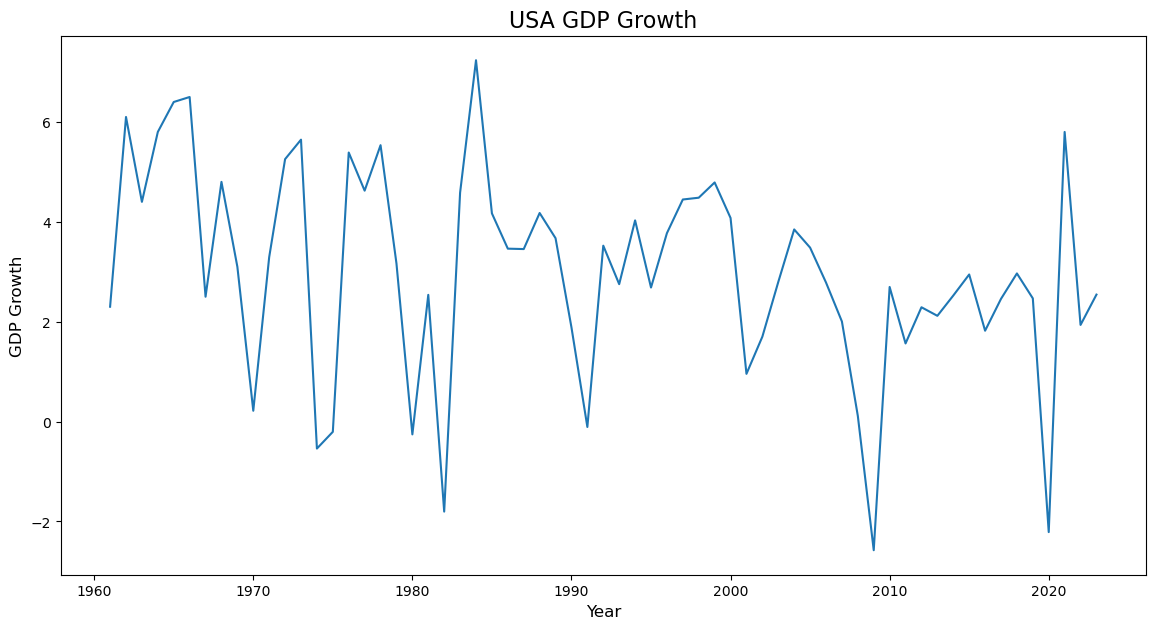

In [39]:
plt.figure(figsize=(14, 7))
plt.plot(USA_d_melted['Year'], USA_d_melted['GDP Growth'])
plt.title("USA GDP Growth", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("GDP Growth", fontsize=12)

## Preprocessing:

### Preprocess the dataset for Employment to Population Ratio Values

In [40]:
merged_data_e.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2020,2021,2022,2023,Unnamed: 68,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,Aruba,ABW,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,Africa Eastern and Southern,AFE,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,63.560774,63.612563,64.302928,64.436966,NaN,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,Afghanistan,AFG,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,36.711000,36.263000,32.333000,31.268000,NaN,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,Africa Western and Central,AFW,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,58.261096,58.490208,59.433005,59.620615,NaN,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,Angola,AGO,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,62.550000,64.304000,64.447000,64.492000,NaN,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [41]:
merged_data_e = merged_data_e.drop(columns=['Indicator Name', 'Indicator Code', 'SpecialNotes', 'TableName'])
melted_data_e = merged_data_e.melt(
    id_vars=['Country Name', 'Country Code', 'Region', 'IncomeGroup'], 
    var_name='Year', 
    value_name='Employment to Population Ratio'
)

#drop missing values
melted_data_e = melted_data_e.dropna(subset=['Employment to Population Ratio'])

melted_data_e['Year'] = melted_data_e['Year'].astype(int)

melted_data_e = melted_data_e.sort_values(['Country Name', 'Year'])

#check if theres any remaining missing values in other columns
print(melted_data_e.isnull().sum())
melted_data_e.head()

Country Name                         0
Country Code                         0
Region                            1584
IncomeGroup                       1617
Year                                 0
Employment to Population Ratio       0
dtype: int64


,Country Name,Country Code,Region,IncomeGroup,Year,Employment to Population Ratio
8248,Afghanistan,AFG,South Asia,Low income,1991,43.256
8514,Afghanistan,AFG,South Asia,Low income,1992,43.244
8780,Afghanistan,AFG,South Asia,Low income,1993,43.207
9046,Afghanistan,AFG,South Asia,Low income,1994,43.162
9312,Afghanistan,AFG,South Asia,Low income,1995,43.125


### Preprocess the data for GDP Growth

In [42]:
merged_data_gdpg = merged_data_gdpg.drop(columns=['Indicator Name', 'Indicator Code', 'SpecialNotes', 'TableName'])
melted_data_growth = merged_data_gdpg.melt(
    id_vars=['Country Name', 'Country Code', 'Region', 'IncomeGroup'], 
    var_name='Year', 
    value_name='GDP Growth'
)

melted_data_growth = melted_data_growth.dropna(subset=['GDP Growth'])

melted_data_growth['Year'] = melted_data_growth['Year'].astype(int)

melted_data_growth = melted_data_growth.sort_values(['Country Name', 'Year'])

print(melted_data_growth.isnull().sum())
melted_data_growth.head()


Country Name       0
Country Code       0
Region          2883
IncomeGroup     2937
Year               0
GDP Growth         0
dtype: int64


,Country Name,Country Code,Region,IncomeGroup,Year,GDP Growth
10908,Afghanistan,AFG,South Asia,Low income,2001,-9.431974
11174,Afghanistan,AFG,South Asia,Low income,2002,28.600001
11440,Afghanistan,AFG,South Asia,Low income,2003,8.832278
11706,Afghanistan,AFG,South Asia,Low income,2004,1.414118
11972,Afghanistan,AFG,South Asia,Low income,2005,11.229715


### Preprocess the data for GDP per Capita

In [ ]:
merged_data_gdppc = merged_data_gdppc.drop(columns=['Indicator Name', 'Indicator Code', 'SpecialNotes', 'TableName'])
melted_data_gdppc = merged_data_gdppc.melt(
    id_vars=['Country Name', 'Country Code', 'Region', 'IncomeGroup'], 
    var_name='Year', 
    value_name='GDP per Capita'
)

melted_data_gdppc = melted_data_gdppc.dropna(subset=['GDP per Capita'])

melted_data_gdppc['Year'] = melted_data_gdppc['Year'].astype(int)

melted_data_gdppc = melted_data_gdppc.sort_values(['Country Name', 'Year'])

print(melted_data_gdppc.isnull().sum())
print(melted_data_gdppc.shape)
melted_data_gdppc.head()

Country Name         0
Country Code         0
Region            2931
IncomeGroup       2931
Year                 0
GDP per Capita       0
dtype: int64
(13963, 6)


,Country Name,Country Code,Region,IncomeGroup,Year,GDP per Capita
10642,Afghanistan,AFG,South Asia,Low income,2000,317.584470
10908,Afghanistan,AFG,South Asia,Low income,2001,285.502194
11174,Afghanistan,AFG,South Asia,Low income,2002,344.224181
11440,Afghanistan,AFG,South Asia,Low income,2003,347.415239
11706,Afghanistan,AFG,South Asia,Low income,2004,338.739396


## Done preprocessing! Now we want to generate some summary of key variables

Employment to population ratio data:

In [ ]:
print(melted_data_e.info())

print(melted_data_e.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 7752 entries, 8248 to 17023
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    7752 non-null   object 
 1   Country Code                    7752 non-null   object 
 2   Region                          6168 non-null   object 
 3   IncomeGroup                     6135 non-null   object 
 4   Year                            7752 non-null   int64  
 5   Employment to Population Ratio  7752 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 423.9+ KB
None
              Year  Employment to Population Ratio
count  7752.000000                     7752.000000
mean   2006.993937                       56.495562
std       9.519366                       10.794473
min    1991.000000                       22.634000
25%    1999.000000                       50.521439
50%    2007.000000              

In [47]:
print(melted_data_gdppc.info())

print(melted_data_gdppc.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 13963 entries, 10642 to 17023
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    13963 non-null  object 
 1   Country Code    13963 non-null  object 
 2   Region          11032 non-null  object 
 3   IncomeGroup     11032 non-null  object 
 4   Year            13963 non-null  int64  
 5   GDP per Capita  13963 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 763.6+ KB
None
               Year  GDP per Capita
count  13963.000000    13963.000000
mean    1994.439948    11001.109237
std       17.776249    17567.457562
min     1960.000000      122.516872
25%     1980.000000     1299.386417
50%     1996.000000     3659.353391
75%     2010.000000    12856.140169
max     2023.000000   228667.935283


In [49]:
print(melted_data_growth.info())

print(melted_data_growth.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 13850 entries, 10908 to 17023
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  13850 non-null  object 
 1   Country Code  13850 non-null  object 
 2   Region        10967 non-null  object 
 3   IncomeGroup   10913 non-null  object 
 4   Year          13850 non-null  int64  
 5   GDP Growth    13850 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 757.4+ KB
None
               Year    GDP Growth
count  13850.000000  13850.000000
mean    1994.863827      3.685373
std       17.500113      6.345220
min     1961.000000    -64.047107
25%     1981.000000      1.411385
50%     1996.000000      3.809957
75%     2010.000000      6.111642
max     2023.000000    153.492641


## Analysis: